# Tensorflow playground with code

Remember when we played witht the tensorflow playground? Well let's do a quick exercise in order to recreate these examples but with code!

* import `make_circles` from sklearn and create an object data containing circle data of 1000 observations, with some noise and a factor of your choice.



In [118]:
from sklearn.datasets import make_circles

data = make_circles(n_samples=1000,noise=0.1,factor=0.5)
# print(data)

* Create an object `x` and `y` containing the training and target variable respectively.

In [119]:
x = data[0]
y = data[1]

* Visualize the data

In [120]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter(x = x[:,0], y = x[:,1], mode = "markers")
    ]
)
fig.show()

* Split them in train and validation set with sklearn

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y)     # test_size=0.2 ???

* Form two batch datasets, one for training data, one for validation data

In [122]:
import tensorflow as tf

train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val   = tf.data.Dataset.from_tensor_slices((x_val,y_val))

# train.shuffle(len(train)) will allocate a buffer of size len(train) for picking random entries.
# This buffer will be connected to the source dataset.
# .batch() take the first batch_size entries and make a batch out of them.
train_batch = train.shuffle(len(train)).batch(8)
val_batch   = val.shuffle(len(val)).batch(8)

* Create a neural network model in order to make predictions on this dataset, try and make it as simple as possible.

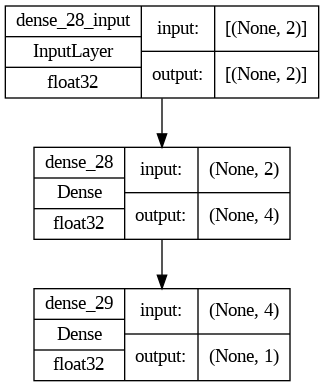

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
  Dense(4, "relu", input_shape=[2]),
  Dense(1, "sigmoid")
])
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

* Compile the model using Adam and a loss function and metric that suit our problem.

In [124]:
from tensorflow.keras.losses     import BinaryCrossentropy
from tensorflow.keras.metrics    import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(0.01),
              loss      = BinaryCrossentropy(),
              metrics   = [BinaryAccuracy()])         # Bien voir que c'est une liste

* Train the model over 100 epochs

In [125]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)

Epoch 1/100
94/94 [==============================] - 1s 7ms/step - loss: 0.6825 - binary_accuracy: 0.4987 - val_loss: 0.6617 - val_binary_accuracy: 0.5600
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6603 - binary_accuracy: 0.5453 - val_loss: 0.6422 - val_binary_accuracy: 0.5760
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6423 - binary_accuracy: 0.5813 - val_loss: 0.6188 - val_binary_accuracy: 0.6360
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6108 - binary_accuracy: 0.6293 - val_loss: 0.5723 - val_binary_accuracy: 0.7080
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5715 - binary_accuracy: 0.7027 - val_loss: 0.5324 - val_binary_accuracy: 0.7560
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5425 - binary_accuracy: 0.7147 - val_loss: 0.5101 - val_binary_accuracy: 0.7600
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - los

* Plot the evolution of the train loss and the validation loss and the evolution of the train metric and the validation metric.

In [126]:
len(history.history["loss"])


100

In [127]:
from plotly import graph_objects as go
fig = go.Figure(data=[
  go.Scatter(
    y=history.history["loss"],
    name="Training loss",
    mode="lines",
  ),
  go.Scatter(
    y=history.history["val_loss"],
    name="Validation loss",
    mode="lines",
  )
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

In [128]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["binary_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history.history["val_binary_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          )
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

In [129]:
from plotly import express as px
import numpy as np


x1_example = np.linspace(-2,2,100)
x2_example = np.linspace(-2,2,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[go.Contour(x=x1_example, y=x2_example, z=pred_example, colorscale='RdBu')])
fig.add_trace(go.Scatter(x = x[:,0], y = x[:,1], mode = "markers"))
fig.show()

* Did the model overfit ?

* Can you try and plot the decision function of the model in the data space? Like we saw in the tensorflow playground? You can get inspiration <a href="https://plotly.com/python/knn-classification/"> here </a>

* Use the following code to produce some spiral data:

In [130]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

N = 1000
theta = np.sqrt(np.random.rand(N))*4*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)
x_a = x_a/np.abs(x_a).max()

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)
x_b = x_b/np.abs(x_b).max()

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

fig = go.Figure(data=[
                      go.Scatter(x=res[:,0],
                                 y=res[:,1],
                                 mode="markers",
                                 marker=dict(
                                     color=res[:,2],

                                     )
                                 )
                      ]
                )
fig.show()

data = res[:,0:2]
target = res[:,-1]

* Split into train and validation set

In [131]:
X_train, X_val, y_train, y_val = train_test_split(data, target)

* Form a train and validation batch dataset

In [132]:
train_batch = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(len(X_train)).batch(8)
val_batch   = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(len(X_val)).batch(8)

* Create a neural network model that can acheive good predictions on the train set (for now we do not care about overfitting)

In [133]:
# montre ce que le généreteur retourne
next(iter(train_batch))

(<tf.Tensor: shape=(8, 2), dtype=float64, numpy=
 array([[ 0.50612614,  0.29656569],
        [-0.74341193, -0.15858287],
        [ 0.56229017, -0.32457449],
        [ 0.11876817, -0.83066941],
        [-0.34642335, -0.47041326],
        [ 0.29826138,  0.20666595],
        [ 0.85305809, -0.39399758],
        [ 0.66692167, -0.00558301]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([0., 0., 1., 0., 1., 1., 0., 1.])>)

In [134]:
model = Sequential([
  Dense(64, "relu", input_shape=[2]),
  Dense(32, "relu"),
  Dense(1, "sigmoid")
])

* Compile the model with the right loss and metric and Adam optimizer

In [135]:
model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),   # Classification, binaire => BinaryCrossentropy
              metrics=[BinaryAccuracy()])

* Train the model over 100 epochs

In [136]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.6435 - binary_accuracy: 0.6213 - val_loss: 0.6142 - val_binary_accuracy: 0.6300
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5725 - binary_accuracy: 0.6500 - val_loss: 0.5193 - val_binary_accuracy: 0.6920
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5205 - binary_accuracy: 0.6827 - val_loss: 0.4749 - val_binary_accuracy: 0.7220
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5112 - binary_accuracy: 0.6800 - val_loss: 0.4433 - val_binary_accuracy: 0.7280
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4540 - binary_accuracy: 0.6993 - val_loss: 0.3935 - val_binary_accuracy: 0.7440
Epoch 6/100
188/188 [==============================] - 0s 3ms/step - loss: 0.3766 - binary_accuracy: 0.7847 - val_loss: 0.3021 - val_binary_accuracy: 0.8600
Epoch 7/100
188/188 [==============================] - 1s 

* Is the model overfitting? Use visualization

In [137]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          )
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

* Visualize the decision boundary, would you say the model could benefit from some regularization?

In [138]:
from plotly import express as px
import numpy as np

x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

# exemple len=10_000 nd.array de [x,y]
example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1), x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
    )
])
fig.add_trace(go.Scatter(x = data[:,0],
                         y = data[:,1],
                         mode = "markers",

                         )
)
fig.show()

* Create a new model and add regularization to each layer, train it and visualize the decision boundary

In [139]:
len(example)

10000

In [140]:
from tensorflow.keras.regularizers import L2
l2 = L2(0.0001)

model = Sequential([
                    Dense(64,"relu",input_shape=[2], kernel_regularizer=l2),
                    Dense(32,"relu", kernel_regularizer=l2),
                    Dense(1,"sigmoid", kernel_regularizer=l2)
])

model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

In [141]:
history = model.fit(train_batch,epochs=500,validation_data=val_batch)

Epoch 1/500
188/188 [==============================] - 2s 3ms/step - loss: 0.6461 - binary_accuracy: 0.6200 - val_loss: 0.6185 - val_binary_accuracy: 0.6420
Epoch 2/500
188/188 [==============================] - 1s 4ms/step - loss: 0.5935 - binary_accuracy: 0.6413 - val_loss: 0.5565 - val_binary_accuracy: 0.6960
Epoch 3/500
188/188 [==============================] - 1s 4ms/step - loss: 0.5438 - binary_accuracy: 0.6747 - val_loss: 0.4716 - val_binary_accuracy: 0.7200
Epoch 4/500
188/188 [==============================] - 0s 2ms/step - loss: 0.4906 - binary_accuracy: 0.6893 - val_loss: 0.4254 - val_binary_accuracy: 0.7320
Epoch 5/500
188/188 [==============================] - 1s 3ms/step - loss: 0.4955 - binary_accuracy: 0.6953 - val_loss: 0.4547 - val_binary_accuracy: 0.7400
Epoch 6/500
188/188 [==============================] - 1s 3ms/step - loss: 0.4804 - binary_accuracy: 0.7047 - val_loss: 0.4262 - val_binary_accuracy: 0.7340
Epoch 7/500
188/188 [==============================] - 1s 

In [142]:
from plotly import express as px
import numpy as np
x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
    )
])
fig.add_trace(go.Scatter(x = data[:,0],
                         y = data[:,1],
                         mode = "markers",

                         )
)
fig.show()

It looks like regularization only very marginally improves the model.